**Advanced Lane Finding Project**

The goal of this project is to develop a pipeline to process a video stream from a forward-facing camera mounted on the front of a car, and output an annotated video which identifies:
1) The position of the lane lines
2) Location of vehicle relative to center of lane
3) radius of curvature of road

The steps in pipeline are:
1)  Apply distortion correction using a calculated camera calibration matrix and distortion coefficients.
2) Apply a perspective transformation to warp the image to a birds eye view perspective of the lane lines
3) Apply color thresholds to create a binary image which isolates the pixels representing lane lines.
4) Identify the lane line pixels and fit polynomials to the lane boundaries.
5) Determine curvature of the lane and vehicle position with respect to center.
6) Warp the detected lane boundaries back onto the original image.
7) Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position

#### Step1: Camera Calibration and Distortion correction
In this step i used OpenCV functions findChessboardCorners() and drawChessboardCorners() to identify the locations of internal corners of chessboard. The array of object points are created correspond to the chessboard internal corners. The object points and output(corners) of findChessboardCorners fed to cameraCalibration(cv2.calibrateCamera()) as image points to camera calibration and distortion coeficient. Then applied the output(distortion coefficient and camera matrix) of camera calibration to the undistort(cv2.undistort()) function to undo the distortion in images.
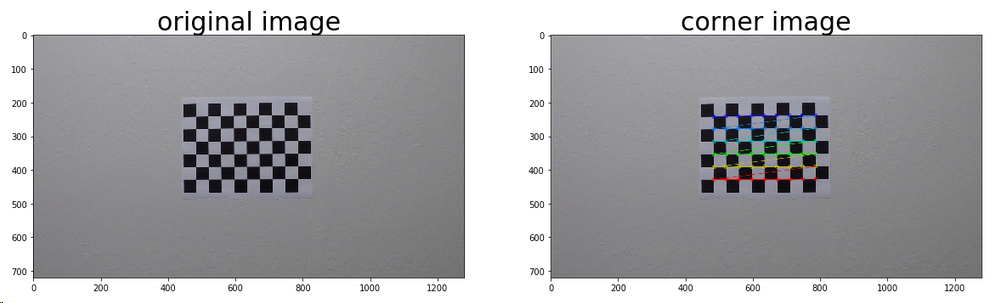


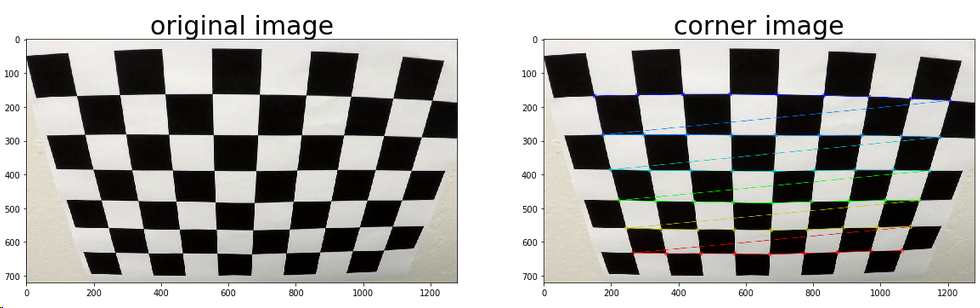

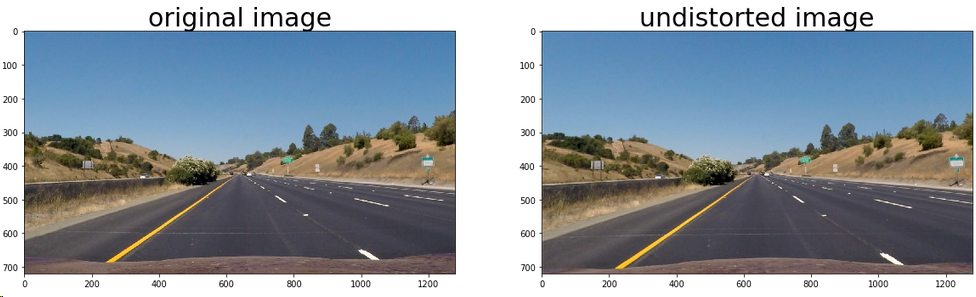

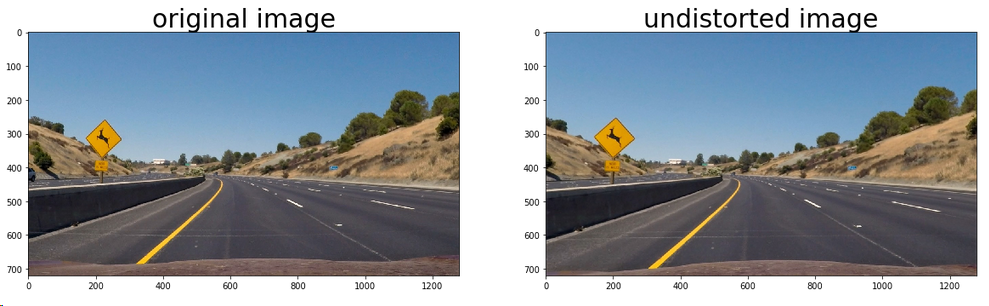

#### Step2:Perspective transform

The goal of this step is to change the road view, because the videocaptured by from facing camera provides us the front road image which will be triangle in shape. It is not wasy to find the lane lines on curved road roads with this view. So we need perspective transform.
In this step getPerspectiveTransform() and warpPerspective() used to transform the undistorted image into birds eye view,
which focus only on lane lines and displays both of the lane lines parallel to eachtoher.
Bird eye view will be easy to calculate the radius of curvature and find the lane curves and fitting it bak to original image.
To achieve the perpective transform, have to provide matrix of four source points on the undistorted image and remaps them to the four destination points of warped image. The source and destination points were selected manually by visualizing the locations of the lane lines on a series of test images.
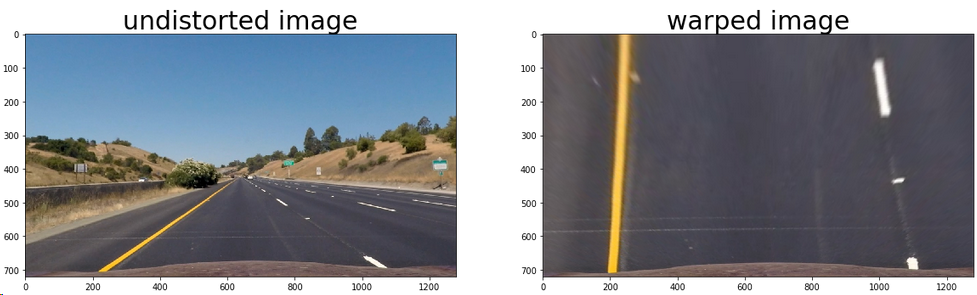

#### Step3: Apply Threshold and convert to binary image

In this step used the warped image which was output of birds_eye() function and tried converting to different Gradients and color spaces which detect both yellow and white lanes and ignores rest of of pixels. 
Filtered lanelines alone by setting a threshold value for color spaces and gradients and assigned them to binary values. 
    *The S-Channel from HLS-Color space detects both white and yellow lines, but in shadow region it provides noisy signals.
    *The sobel operator does not find edges of lanes in lighter region and creating noises in shadow region. 
    *The L-Channel from LUV color space find s the white lines, but ignores the yellow lines in lighter region. 
    *And B-channel from LAB color space finds the yellow lines, but could not finds the whiteline. 
Then created the combined binary by selecting only L-channel from LUV space and B-channel from LAB space, because it almost finds both the yellow and white lines and creates less noise
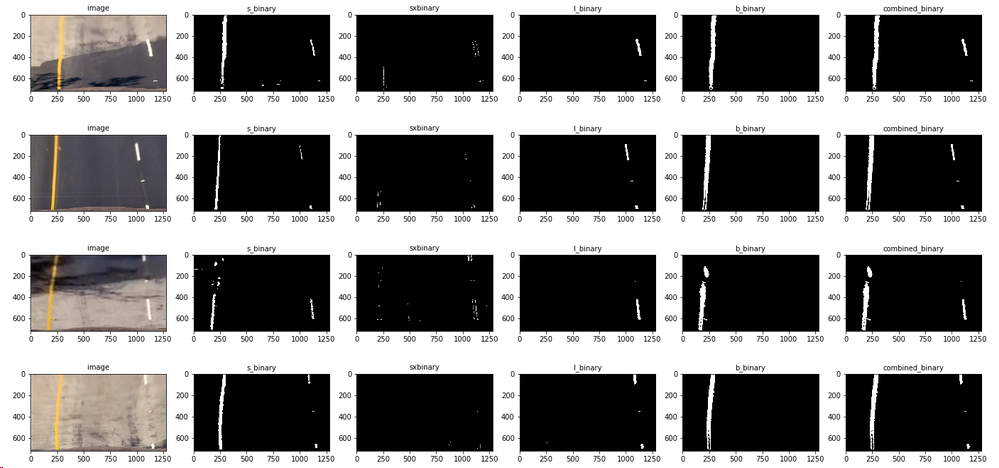

#### Step 4,5: Fit polynomial curve to lane lines and calculate radius of curvature and vehicle position

Here used the combined binary image to isolate the non zero pixels belongs to lane lines. The next step is to fit the polynomial urve to each lane line
    *Identifying peaks in a histogram of the image to determine location of lane lines.
    *Identifying all non zero pixels around histogram peaks using the numpy function numpy.nonzero().
    *Fitting a polynomial to each lane using the numpy function numpy.polyfit().

After fitting the polynomials I was able to calculate the position of the vehicle with respect to center with the following calculations:

   *Calculated the average of the x intercepts from each of the two polynomials position = (rightx_int+leftx_int)/2
    *Calculated the distance from center by taking the absolute value of the vehicle position minus the halfway point along the horizontal axis distance_from_center = abs(image_width/2 - position)
    *If the horizontal position of the car was greater than image_width/2 than the car was considered to be left of center, otherwise right of center.
    *Finally, the distance from center was converted from pixels to meters by multiplying the number of pixels by 3.7/700.
Then the below formula used to calculate the radius of curvature. The final radius of curvature was taken by average the left and right curve
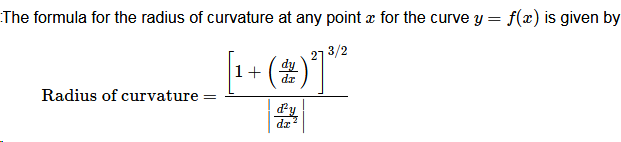


#### step6: Display detected lane boundaries back to original image and Radius of curvature, vehicle position with respect to center

The final step is to plot polynomial curve on the warped image which matches to the lane lines and fill space between two lane lines using cv2.fillpoly()

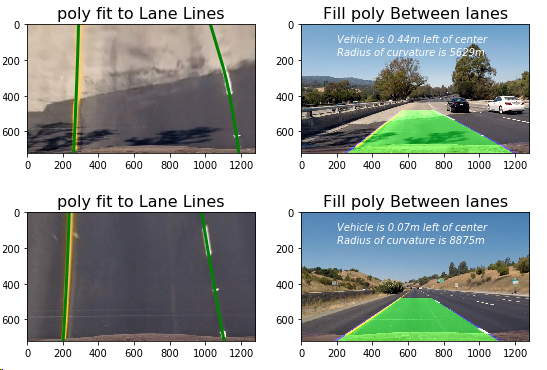

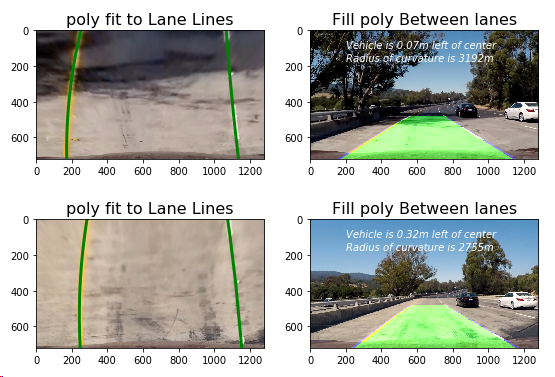

#### Video pipeline

In this step created a class for each of the left and right lane lines and stored features of each lane for averaging across frames.

The video pipeline checks whether the lane was detected in the previous frame. If detected, then it checks for lane pixels to the polynomial calculated in the previous frame. Through this step the pipeline does not required to scan the entire image, and the pixels detected have a high confidence of belonging to the lane line because they are based on the location of the lane in the previous frame.

If at any time, the pipeline fails to detect lane pixels based on the the previous frame, it will go back in to blind search mode and scan the entire binary image for nonzero pixels to represent the lanes.

In order to make the output smooth I chose to average the coefficients of the polynomials for each lane line over a span of 10 frames. The below is the result of my pipeline running on the test video provided for the project, as well as an optional challenge video which presented additional challenges to the lane detection pipeline.


Project Video:
https://view5639f7e7.udacity-student-workspaces.com/notebooks/CarND-Advanced-Lane-Lines/result.mp4

Challenge video:
https://view5639f7e7.udacity-student-workspaces.com/notebooks/CarND-Advanced-Lane-Lines/challenge_result.mp4


### Discussion
1. Briefly discuss any problems / issues you faced in your implementation of this project. Where will your pipeline likely fail? What could you do to make it more robust?

Due to lighting conditions and shadows, the S-channel could not able to pickup the both lines, eventhough if it identifies also, some noise is in s-channel. But L-channel picks up the whiteline and B-channel from LAB color space picks up the yellow lines very well. The sobel gradients did not find the lanes in all the conditions.

When there is heavy shadow over the road, suddenly could not able to track the lane lines.

I should try with the below algorithim also for further research:

1)Dissection of curves into large number of Hough lines (called Curve stitching) and then implementing  Mean  value  theorem  using  weighted  centroids  to  keep  track  of  curves which works well in adverse conditions like discontinuous curves (lanes). 2)Differentiating various curves (lanes) based on slope of curves. This helps in developing algorithm for tracking varying slopes of lane and develops efficient feedback system for proper localization in between roads. 3)Clustering  of  Hough  lines  to  avoid  confusion  due  to  other  lane  type  noises  present  on road. 4)Shadow, illumination correction and noise filters implemented on HSV color frame. 5)Feedback algorithm to continuously compare parameters (road texture) of current image frame with previous frame of image to decide boundaries in case of missing lanes or well defined boundaries.
